In [1]:
# Libraries

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib_venn import venn2
from collections import Counter
from pprint import pprint

%matplotlib inline

In [2]:
# Dataset

print(os.listdir('./dataset'))

['campaign_data.csv', 'mongo_to_csv.py', '__pycache__', 'campaign_descirbe.md', 'devfest-registered.xlsx', 'devtalks_describe.md', 'registrations_describe.md', 'devfest.csv', 'devfest_describe.md', 'teams_describe.md', 'devtalks.csv', 'credentials.py', 'devfest-teams.xlsx']


In [3]:
# Campaign dataset

df = pd.read_csv('./dataset/campaign_data.csv')

print('Campaign')
print('Shape: ', df.shape)

Campaign
Shape:  (295, 18)


In [4]:
# Data head

df.head()

,fest_id,campaign_id,source,ip,city,country,countryCode,isp,lat,lon,org,query,region,regionName,status,timezone,zip,timestamp
0,0Zrk29JSlVqjkHeai0Hk,a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2,whatsapp,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 10:16:17
1,4X6wBWASnaFBtGj9LQoS,80692e9c-2c39-4c7e-97d4-a2060333ff17,Facebook,106.203.21.154,Chennai,India,IN,Bharti Airtel,13.0833,80.2833,Bharti Airtel,106.203.21.154,TN,Tamil Nadu,success,Asia/Kolkata,600001,2018-09-12 10:34:36
2,UItdaK1sPQXSOA7BwjC0,1cc44a4d-40c4-4b53-abce-0ff105405905,Email,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 23:19:43
3,UItdaK1sPQXSOA7BwjC0,1cc44a4d-40c4-4b53-abce-0ff105405905,Email,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 23:19:55
4,UItdaK1sPQXSOA7BwjC0,1cc44a4d-40c4-4b53-abce-0ff105405905,Email,157.51.135.128,Chennai,India,IN,Jio,13.0833,80.2833,Jio,157.51.135.128,TN,Tamil Nadu,success,Asia/Kolkata,600001,2018-09-12 23:24:34


In [5]:
# Description

print('Columns')
print(df.columns)

Columns
Index(['fest_id', 'campaign_id', 'source', 'ip', 'city', 'country',
       'countryCode', 'isp', 'lat', 'lon', 'org', 'query', 'region',
       'regionName', 'status', 'timezone', 'zip', 'timestamp'],
      dtype='object')


In [6]:
# Column - fest_id

print('fest_id')
print('Unique value count: ', df['fest_id'].nunique())
print('Unique values: ', df['fest_id'].unique())

fest_id
Unique value count:  3
Unique values:  ['0Zrk29JSlVqjkHeai0Hk' '4X6wBWASnaFBtGj9LQoS' 'UItdaK1sPQXSOA7BwjC0']


Counter({'UItdaK1sPQXSOA7BwjC0': 293,
         '0Zrk29JSlVqjkHeai0Hk': 1,
         '4X6wBWASnaFBtGj9LQoS': 1})


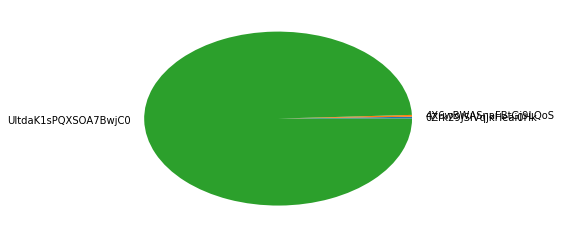

In [7]:
# Count plot - fest_id

count = Counter(df['fest_id'])
pprint(count)

label = []
size = []

for lab in count.keys():
    label.append(lab)
    size.append(count[lab])

plt.pie(size, labels=label)
plt.show()

In [8]:
# Column - campaign_id

print('campaign_id')
print('Uniuqe value count: ', df['campaign_id'].nunique())
print('Unique values: ', df['campaign_id'].unique())

campaign_id
Uniuqe value count:  4
Unique values:  ['a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2'
 '80692e9c-2c39-4c7e-97d4-a2060333ff17'
 '1cc44a4d-40c4-4b53-abce-0ff105405905'
 'a2e19bdc-73db-4dc9-899a-3bc5b86f4009']


Counter({'1cc44a4d-40c4-4b53-abce-0ff105405905': 176,
         'a2e19bdc-73db-4dc9-899a-3bc5b86f4009': 117,
         'a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2': 1,
         '80692e9c-2c39-4c7e-97d4-a2060333ff17': 1})


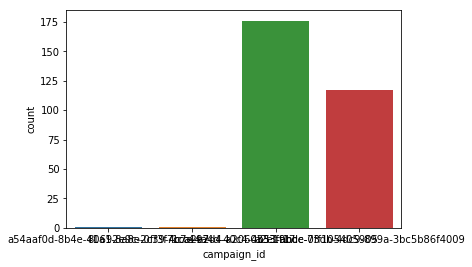

In [9]:
# Count plot - campaign_id

count = Counter(df['campaign_id'])
pprint(count)

sns.countplot(df['campaign_id'])
plt.show()

In [10]:
# Column - source

print('source')
print('Unique value count: ', df['source'].nunique())
print('Unique values: ', df['source'].unique())

source
Unique value count:  4
Unique values:  ['whatsapp' 'Facebook' 'Email' 'LinkedIn']


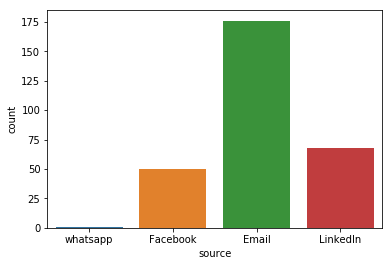

In [11]:
# Count plot - source

sns.countplot(df['source'])
plt.show()

In [12]:
# Column - ip

print('ip')
print('Unique value count: ', df['ip'].nunique())

ip
Unique value count:  213


In [13]:
# Column - country

print('country')
print('Unique value count: ', df['country'].nunique())
print('Unique values: ', df['country'].unique())


count = Counter(df['country'])
pprint(count)

country
Unique value count:  9
Unique values:  ['India' 'United States' 'United Arab Emirates' 'China' 'United Kingdom'
 'Argentina' 'Republic of Lithuania' 'Peru' 'Germany']
Counter({'India': 279,
         'United States': 6,
         'Germany': 3,
         'United Arab Emirates': 2,
         'China': 1,
         'United Kingdom': 1,
         'Argentina': 1,
         'Republic of Lithuania': 1,
         'Peru': 1})


In [14]:
# Column - countryCode

count = Counter(df['countryCode'])
pprint(count)

Counter({'IN': 279,
         'US': 6,
         'DE': 3,
         'AE': 2,
         'CN': 1,
         'GB': 1,
         'AR': 1,
         'LT': 1,
         'PE': 1})


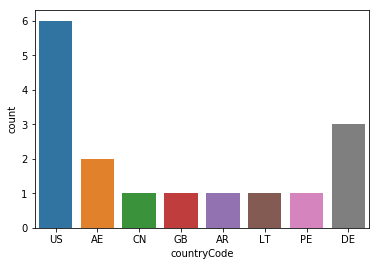

In [15]:
# Count plot - countryCode

sns.countplot(df[df['countryCode'] != 'IN']['countryCode'])
plt.show()

In [16]:
# Column - isp

print('isp')
print('Unique value count: ', df['isp'].nunique())

isp
Unique value count:  36


In [17]:
# Column - lat and lon

print('lat')
print('Unique value count: ', df['lat'].nunique())

print('lon')
print('Unique value count: ', df['lon'].nunique())

lat
Unique value count:  62
lon
Unique value count:  60


In [18]:
# Column - org

print('org')
print('Unique value count: ', df['org'].nunique())

org
Unique value count:  34


In [19]:
# Column - region

print('region')
print('Unique value count: ', df['region'].nunique())

region
Unique value count:  27


In [20]:
# Column - regionName

print('regionName')
print('Unique value count: ', df['regionName'].nunique())

regionName
Unique value count:  29


In [21]:
# Column - zip

print('zip')
print('Unique value count: ', df['zip'].nunique())

zip
Unique value count:  79


In [22]:
# Column - timestamp

print('timestamp')
print('Sample: ', df['timestamp'][0])

timestamp
Sample:  2018-09-12 10:16:17


In [23]:
# Convert str to datetime
# Parameters: 
# data - String data format
# Return:
# datetime object

def convert_to_datetime(data):
    return datetime.strptime(data[:-3], '%Y-%m-%d %H:%M')

In [24]:
# Type conversion to datatime

print('Type of timestamp: ', type(df['timestamp'][0]))
print('Sample: ', df['timestamp'][0])

print('\nConverting...\n')
df['timestamp'] = df['timestamp'].apply(convert_to_datetime)

print('Type of timestamp: ', type(df['timestamp'][0]))
print('Sample: ', df['timestamp'][0])

Type of timestamp:  <class 'str'>
Sample:  2018-09-12 10:16:17

Converting...

Type of timestamp:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Sample:  2018-09-12 10:16:00


In [26]:
# Splitting datetime into date and time

df['date'] = [d.date() for d in df['timestamp']]
df['time'] = [d.time() for d in df['timestamp']]

df.head(2)

,fest_id,campaign_id,source,ip,city,country,countryCode,isp,lat,lon,org,query,region,regionName,status,timezone,zip,timestamp,date,time
0,0Zrk29JSlVqjkHeai0Hk,a54aaf0d-8b4e-41a1-8a8e-0ff3f7cca2e2,whatsapp,115.249.106.164,Vellore,India,IN,Reliance Communications,12.9333,79.1333,Reliance Communications,115.249.106.164,TN,Tamil Nadu,success,Asia/Kolkata,632014,2018-09-12 10:16:00,2018-09-12,10:16:00
1,4X6wBWASnaFBtGj9LQoS,80692e9c-2c39-4c7e-97d4-a2060333ff17,Facebook,106.203.21.154,Chennai,India,IN,Bharti Airtel,13.0833,80.2833,Bharti Airtel,106.203.21.154,TN,Tamil Nadu,success,Asia/Kolkata,600001,2018-09-12 10:34:00,2018-09-12,10:34:00
